In [1]:
# Importing required libraries
import numpy as np
import os
import cv2
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVR
import matplotlib.pyplot as plt

In [2]:
# Mount Google Drive to access your dataset
drive.mount('/content/drive')

# Set the path to the dataset
data_path = '/content/drive/MyDrive/Images/'  # Adjust this path based on your drive structure
categories = ['cats', 'dogs']

# Initialize data and labels lists
data = []
labels = []

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Preprocessing the images
def load_images_from_folder(folder, label):
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        if img is not None:
            # Resize images to a fixed size (e.g., 64x64 to reduce complexity and time)
            img = cv2.resize(img, (64, 64))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert to grayscale to reduce features
            data.append(img)
            labels.append(label)

In [4]:
# Load images for each category
for category in categories:
    folder_path = os.path.join(data_path, category)
    load_images_from_folder(folder_path, category)

# Convert lists to numpy arrays
data = np.array(data)
labels = np.array(labels)

# Flatten the images (as SVR expects 1D feature vectors)
data = data.reshape(len(data), -1)

# Encode the labels to numerical values (0 for cat, 1 for dog)
le = LabelEncoder()
labels = le.fit_transform(labels)

In [5]:
# Split data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

In [6]:
# Train SVR with Linear Kernel
svr_linear = SVR(kernel='linear')
svr_linear.fit(X_train, y_train)


SVR(kernel='linear')

In [7]:
# Train SVR with Polynomial Kernel
svr_poly = SVR(kernel='poly', degree=3)  # You can adjust the degree if needed
svr_poly.fit(X_train, y_train)

SVR(kernel='poly')

In [8]:
# Train SVR with RBF Kernel
svr_rbf = SVR(kernel='rbf')
svr_rbf.fit(X_train, y_train)

SVR()

In [9]:
# Predict and display the test image with all kernels
def predict_and_display_multiple(image_path, models, kernel_names):
    # Load and preprocess the test image
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (64, 64))
    img_gray = cv2.cvtColor(img_resized, cv2.COLOR_BGR2GRAY)
    img_flattened = img_gray.flatten().reshape(1, -1)

    # Set up a subplot for each kernel
    fig, axes = plt.subplots(1, len(models), figsize=(15, 5))

    for ax, model, kernel_name in zip(axes, models, kernel_names):
        # Make a prediction using the specified model
        regression_output = model.predict(img_flattened)[0]
        predicted_label = 'dog' if regression_output > 0.5 else 'cat'

        # Map the output value to a percentage (assuming outputs between 0 and 1)
        prob_cat = (1 - regression_output) * 100  # Cat is closer to 0
        prob_dog = regression_output * 100  # Dog is closer to 1

        # Display the image in the subplot
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.axis('off')
        ax.set_title(f'Kernel: {kernel_name}\nPrediction: {predicted_label}\nDog: {prob_dog:.2f}% | Cat: {prob_cat:.2f}%')

    plt.tight_layout()
    plt.show()


In [10]:
# Path to the image you want to test
test_image_path = '/content/drive/MyDrive/Images/dogs/dog.4246.jpg'  # Change this to the path of the image you want to test

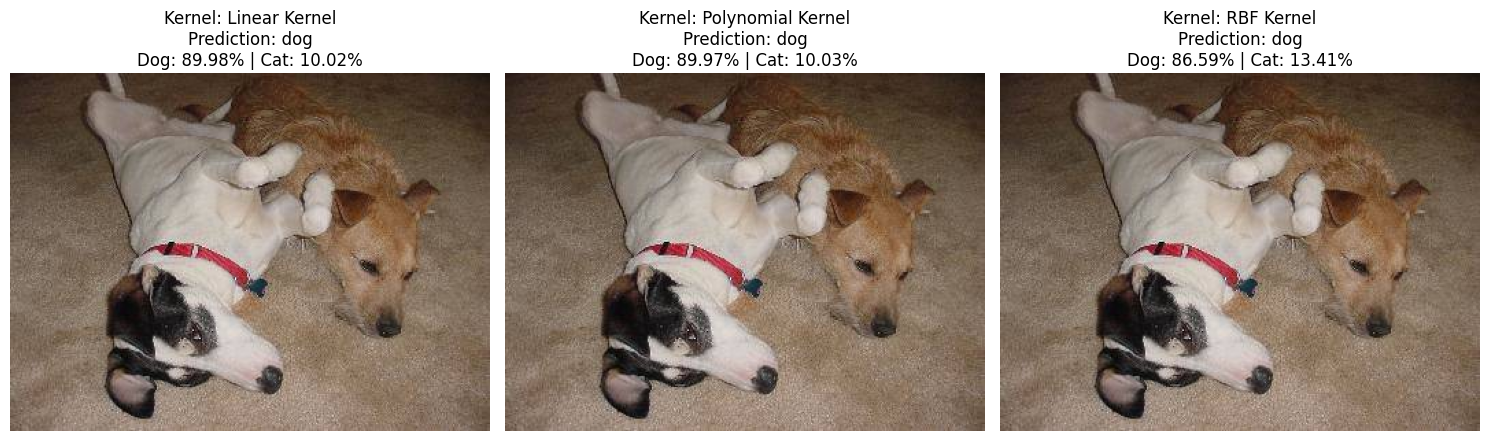

In [11]:
# Test the image with all three kernels
models = [svr_linear, svr_poly, svr_rbf]
kernel_names = ['Linear Kernel', 'Polynomial Kernel', 'RBF Kernel']

# Display the predictions in a single horizontal line
predict_and_display_multiple(test_image_path, models, kernel_names)